# Compare distributions

In [8]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load datasets
data_1999 = pd.read_csv('data/1999.csv')
data_2014 = pd.read_csv('data/2014.csv')
generated_1999_output = pd.read_csv('generated/1999_output.csv')
generated_2014_output = pd.read_csv('generated/2014_output.csv')
usa_names = pd.read_csv('data/usa_names.csv')

# Assuming the gender column in each dataset is named 'gender'
# Assuming the gender values are 'M' for male and 'F' for female

# Aggregate gender counts
gender_counts = {}
for name, df in zip(['1999', '2014', '1999_output', '2014_output', 'usa_names'], 
                    [data_1999, data_2014, generated_1999_output, generated_2014_output, usa_names]):
    gender_counts[name] = df['Gender'].value_counts()

# Perform Chi-square test for each pair of datasets
for name1, count1 in gender_counts.items():
    for name2, count2 in gender_counts.items():
        if name1 != name2:  # Skip self-comparisons
            # Create contingency table
            contingency_table = pd.concat([count1, count2], axis=1)
            contingency_table.columns = [name1, name2]
            
            # Perform Chi-square test
            chi2, p, dof, expected = chi2_contingency(contingency_table)
            
            # Print results
            print(f"Comparison between {name1} and {name2}:")
            print("Chi-square statistic:", chi2)
            print("p-value:", p)
            print("\n")


Comparison between 1999 and 2014:
Chi-square statistic: 0.5638602317692629
p-value: 0.4527090644622489


Comparison between 1999 and 1999_output:
Chi-square statistic: 177.02776955324603
p-value: 2.1597729266460686e-40


Comparison between 1999 and 2014_output:
Chi-square statistic: 173.93794993187765
p-value: 1.0212569770313478e-39


Comparison between 1999 and usa_names:
Chi-square statistic: 18.750943877745957
p-value: 1.4894961735816165e-05


Comparison between 2014 and 1999:
Chi-square statistic: 0.5638602317692629
p-value: 0.4527090644622489


Comparison between 2014 and 1999_output:
Chi-square statistic: 151.701520152158
p-value: 7.363112503164492e-35


Comparison between 2014 and 2014_output:
Chi-square statistic: 148.89429375685992
p-value: 3.0244511856590977e-34


Comparison between 2014 and usa_names:
Chi-square statistic: 26.495379149053743
p-value: 2.641692554133833e-07


Comparison between 1999_output and 1999:
Chi-square statistic: 177.02776955324603
p-value: 2.159772926

In [2]:
import pandas as pd
from scipy.stats import chi2_contingency

# Load datasets
data_1999 = pd.read_csv('data/1999.csv')
data_2014 = pd.read_csv('data/2014.csv')
generated_1999_output = pd.read_csv('generated/1999_output.csv')
generated_2014_output = pd.read_csv('generated/2014_output.csv')
usa_names = pd.read_csv('data/usa_names.csv')


# Aggregate gender counts
gender_counts = {}
for name, df in zip(['1999', '2014', '1999_output', '2014_output', 'usa_names'], 
                    [data_1999, data_2014, generated_1999_output, generated_2014_output, usa_names]):
    gender_counts[name] = df['Gender'].value_counts()

# Open a file for writing output
with open('gender_distribution_comparison.txt', 'w') as f:
    # Perform Chi-square test for each pair of datasets
    for name1, count1 in gender_counts.items():
        for name2, count2 in gender_counts.items():
            if name1 != name2:  # Skip self-comparisons
                # Create contingency table
                contingency_table = pd.concat([count1, count2], axis=1)
                contingency_table.columns = [name1, name2]
                
                # Perform Chi-square test
                chi2, p, dof, expected = chi2_contingency(contingency_table)
                
                # Write results to the file
                f.write(f"Comparison between {name1} and {name2}:\n")
                f.write("Chi-square statistic: {}\n".format(chi2))
                f.write("p-value: {}\n".format(p))
                f.write("\n\n")



FileNotFoundError: [Errno 2] No such file or directory: 'generated/1999_output.csv'

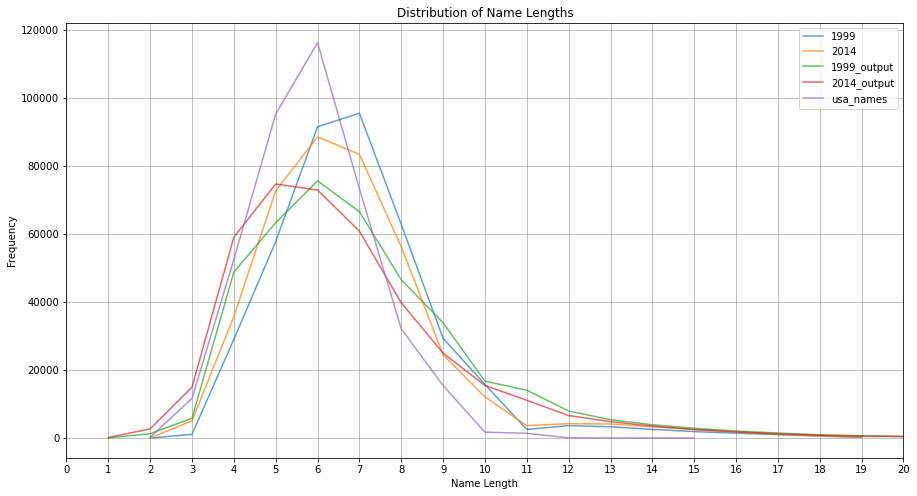

In [43]:
import pandas as pd
import matplotlib.pyplot as plt

# Load datasets
data_1999 = pd.read_csv('samples/1999.csv')
data_2014 = pd.read_csv('samples/2014.csv')
generated_1999_output = pd.read_csv('generated/1999_output.csv')
generated_2014_output = pd.read_csv('generated/2014_output.csv')
usa_names = pd.read_csv('samples/usa.csv')

# Extract name lengths
data_1999['name_length'] = data_1999['Name'].apply(len)
data_2014['name_length'] = data_2014['Name'].apply(len)
generated_1999_output['name_length'] = generated_1999_output['Name'].apply(len)
generated_2014_output['name_length'] = generated_2014_output['Name'].apply(len)
usa_names['name_length'] = usa_names['Name'].apply(len)

plt.figure(figsize=(15, 8))
plt.plot(data_1999['name_length'].value_counts().sort_index(), alpha=0.7, label='1999')
plt.plot(data_2014['name_length'].value_counts().sort_index(), alpha=0.7, label='2014')
plt.plot(generated_1999_output['name_length'].value_counts().sort_index(), alpha=0.7, label='1999_output')
plt.plot(generated_2014_output['name_length'].value_counts().sort_index(), alpha=0.7, label='2014_output')
plt.plot(usa_names['name_length'].value_counts().sort_index(), alpha=0.7, label='usa_names')
plt.xticks(range(0, 21))
plt.xlim(0, 20)  
plt.xlabel('Name Length')
plt.ylabel('Frequency')
plt.title('Distribution of Name Lengths')
plt.legend()
plt.grid(True)
plt.show()

In [29]:
from scipy.stats import ks_2samp
import itertools

# List of datasets
datasets = [data_1999['name_length'], data_2014['name_length'], 
            generated_1999_output['name_length'], generated_2014_output['name_length'], 
            usa_names['name_length']]

# Perform Kolmogorov-Smirnov test for all permutations
for i, dataset1 in enumerate(datasets):
    for j, dataset2 in enumerate(datasets):
        if i < j:  # Avoid redundant comparisons
            statistic, p_value = ks_2samp(dataset1, dataset2)
            print(f"{i} and {j}, s: {statistic}, p: {p_value}")


0 and 1, s: 0.06392500000000004, p: 0.0
0 and 2, s: 0.07877994203740038, p: 0.0
0 and 3, s: 0.15934208745354603, p: 0.0
0 and 4, s: 0.24124, p: 0.0
1 and 2, s: 0.0833174252192368, p: 0.0
1 and 3, s: 0.09541708745354599, p: 0.0
1 and 4, s: 0.18475750000000002, p: 0.0
2 and 3, s: 0.08056214541614565, p: 0.0
2 and 4, s: 0.21870073799703682, p: 0.0
3 and 4, s: 0.15949666726687983, p: 0.0
